In [20]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('TrainingSet.csv')
print(df.shape)
df

(132, 42)


,Unnamed: 0,DateReceived,Website,URLCount,R1Time,CrawlIssues,WebReviewDif,WebsitePriority,ErrorCount,R2Time,...,IncorrectGuidance,Other?,Was it a PSF?,MXQA_Encoded,TeamLead_Encoded,QM_Encoded,Month_Encoded,DP_Encoded,DualReviewer_Encoded,Batch Status
0,632,10/18/2021,deerstags.com,17,140,100,5,QM Check Urgent,0,71,...,False,0,False,8.0,2.0,6.0,3.0,2.0,21.0,0
1,621,10/18/2021,mgchemicals.com,194,500,0,4,QM Check Needed,1,190,...,False,0,False,34.0,4.0,6.0,3.0,7.0,NaN,0
2,703,10/26/2021,godogfun.com,30,90,0,1,PSF,0,30,...,False,0,True,26.0,3.0,7.0,3.0,8.0,NaN,1
3,223,11/16/2021,tourit.com,20,120,0,1,PSF,4,70,...,False,0,True,29.0,3.0,6.0,2.0,8.0,NaN,1
4,14,NaT,manicpanic.com,40,139,25,2,None,3,71,...,False,0,False,40.0,3.0,1.0,0.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,443,10/7/2021,purplepandastore.com,25,120,0,5,QM Check Needed,0,60,...,False,0,False,23.0,5.0,6.0,3.0,8.0,NaN,1
128,913,9/27/2021,logitech.com,151,139,0,2,PSF,2,71,...,False,0,True,23.0,5.0,6.0,4.0,8.0,NaN,1
129,791,9/27/2021,rollplay.com,20,139,100,2,PSF,2,71,...,False,0,True,32.0,2.0,8.0,4.0,8.0,NaN,1
130,29,NaT,aleradetails.com,40,139,25,2,None,3,71,...,False,0,False,17.0,6.0,3.0,1.0,6.0,NaN,0


In [71]:
#for i in range(df.columns.size):
    
dict = df.groupby('WebsitePriority').groups
dict

{'None': [4, 5, 11, 13, 18, 19, 21, 25, 27, 34, 37, 38, 41, 42, 43, 46, 51, 54, 60, 66, 67, 69, 75, 77, 86, 88, 91, 97, 98, 106, 108, 111, 117, 120, 121, 130], 'PSF': [2, 3, 9, 10, 12, 15, 16, 17, 22, 23, 28, 31, 33, 35, 36, 40, 45, 47, 52, 55, 56, 57, 58, 63, 64, 70, 72, 73, 74, 82, 83, 84, 90, 94, 99, 100, 104, 109, 110, 118, 119, 122, 124, 125, 128, 129, 131], 'QM Check Needed': [1, 7, 30, 48, 53, 61, 102, 112, 114, 115, 116, 126, 127], 'QM Check Urgent': [0, 107], 'SF': [6, 8, 14, 20, 24, 26, 29, 32, 39, 44, 49, 50, 59, 62, 65, 68, 71, 76, 78, 79, 80, 81, 85, 87, 89, 92, 93, 95, 96, 101, 103, 105, 113, 123]}

In [72]:
df.groupby('CrawlIssues').groups

{0: [1, 2, 3, 6, 8, 10, 12, 15, 16, 17, 20, 22, 29, 30, 31, 32, 33, 36, 40, 44, 45, 47, 48, 49, 53, 55, 56, 57, 59, 63, 64, 65, 68, 70, 72, 73, 74, 76, 78, 79, 82, 89, 90, 93, 94, 95, 99, 100, 101, 103, 104, 105, 109, 112, 113, 114, 115, 118, 119, 122, 124, 125, 126, 127, 128, 131], 4: [116], 25: [4, 5, 11, 13, 18, 19, 21, 25, 27, 34, 37, 38, 41, 42, 43, 46, 51, 54, 60, 66, 67, 69, 75, 77, 86, 88, 91, 97, 98, 106, 108, 111, 117, 120, 121, 130], 50: [62], 66: [35, 61, 102], 71: [92], 84: [80], 96: [58], 100: [0, 7, 9, 14, 23, 24, 26, 28, 39, 50, 52, 71, 81, 83, 84, 85, 87, 96, 107, 110, 123, 129]}

In [76]:
print(df.groupby('DP_Encoded').groups)


{0.0: [7, 45, 113], 1.0: [42, 51, 60, 66, 74], 2.0: [0, 4, 21, 73, 112, 117], 3.0: [17, 52, 87, 99, 111], 4.0: [18, 26, 40, 56, 61, 65, 69, 77, 96, 106], 6.0: [91, 130], 7.0: [1, 34, 37, 43, 49], 8.0: [2, 3, 6, 9, 12, 14, 15, 16, 20, 22, 23, 24, 28, 30, 31, 32, 33, 35, 36, 39, 44, 47, 48, 55, 57, 59, 63, 70, 71, 72, 76, 78, 79, 80, 81, 83, 84, 85, 89, 92, 93, 94, 95, 100, 102, 103, 104, 105, 107, 109, 110, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 131], 9.0: [8, 10, 38, 121], 10.0: [27, 29, 50, 58, 64, 68, 88, 90, 97], 11.0: [13, 19, 75, 82, 86, 98, 101, 108, 120], 12.0: [25, 54], 13.0: [5, 11, 41, 46, 53, 62, 67]}


In [77]:
df.groupby('DualReviewer_Encoded').groups

{5.0: [20], 9.0: [40], 10.0: [71], 13.0: [62], 17.0: [100], 18.0: [63], 19.0: [89], 20.0: [72], 21.0: [0], 23.0: [112]}

In [78]:
df.groupby('TeamLead_Encoded').groups

{0.0: [12, 31, 35, 52, 53, 56, 62, 92, 101], 1.0: [19, 88, 97, 120], 2.0: [0, 5, 7, 14, 15, 16, 20, 28, 32, 36, 39, 48, 60, 61, 64, 68, 71, 73, 76, 80, 85, 86, 87, 93, 94, 103, 105, 106, 107, 114, 116, 121, 124, 129], 3.0: [2, 3, 4, 10, 11, 13, 21, 23, 24, 29, 45, 46, 50, 55, 59, 63, 65, 67, 69, 74, 77, 79, 83, 90, 96, 110, 111, 112, 115, 122, 123], 4.0: [1, 6, 22, 30, 33, 57, 72, 95, 104, 118, 119, 126], 5.0: [18, 26, 42, 44, 49, 51, 70, 81, 82, 89, 99, 108, 113, 127, 128, 131], 6.0: [34, 75, 130], 7.0: [9, 25, 38, 41, 43, 54, 58, 66, 98, 117, 125], 8.0: [37, 91], 9.0: [8, 17, 40, 47, 78, 84, 100, 102, 109]}

In [79]:
df.groupby('Batch Status').groups

{0: [0, 1, 4, 5, 7, 8, 10, 11, 13, 17, 18, 19, 21, 25, 26, 27, 29, 34, 37, 38, 40, 41, 42, 43, 45, 46, 49, 50, 51, 52, 54, 56, 58, 60, 61, 62, 64, 65, 66, 67, 68, 69, 73, 74, 75, 77, 82, 86, 87, 88, 90, 91, 96, 97, 98, 99, 101, 106, 108, 111, 112, 113, 117, 120, 121, 130], 1: [2, 3, 6, 9, 12, 14, 15, 16, 20, 22, 23, 24, 28, 30, 31, 32, 33, 35, 36, 39, 44, 47, 48, 53, 55, 57, 59, 63, 70, 71, 72, 76, 78, 79, 80, 81, 83, 84, 85, 89, 92, 93, 94, 95, 100, 102, 103, 104, 105, 107, 109, 110, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 131]}

In [156]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
#divido mis datos para entrenar y de prueba, usualmente se hace un 70/30
f_train = df[:round(df['level_0'].size*0.7)] 
f_valid = df[round(df['level_0'].size*0.7):] 


44

# DECISION TREE

In [18]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#If using the pythong interpretor, omit this first line.  It only applies to the Jupyter environment
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
#TRAINING: 
tree_clf.fit(X, y)
#70/30

DecisionTreeClassifier(max_depth=20000, random_state=42)

In [38]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

C:\Users\Yumil\AppData\Local\Temp/ipykernel_28780/1039560117.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


Saving figure decision_tree_decision_boundaries_plot


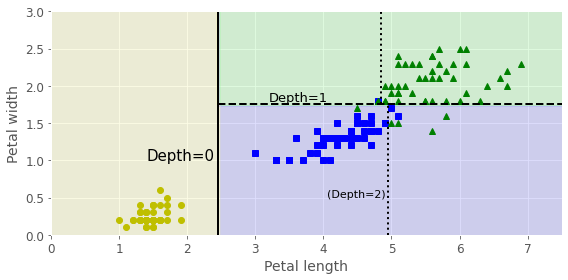

In [39]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")#yellow
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")#blue
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica") #green
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [23]:
tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

array([1])

In [24]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # view the example that is the widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [25]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2) #find indices of examples that are not the max width
X_tweaked = X[not_widest_versicolor] #create a training set with the widest petals removed
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40) #Retrain
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

C:\Users\Yumil\AppData\Local\Temp/ipykernel_28780/281873304.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


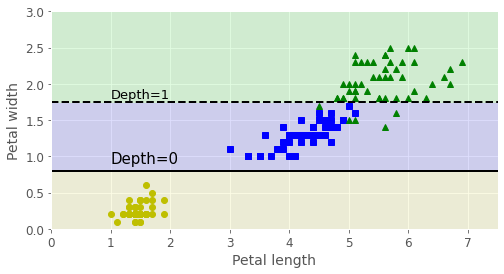

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()